In [1]:
import Pkg; Pkg.add(["Plots","Interact","Images"]);

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/srv/rep/22-course-cse6643/mybinder/Project.toml`
  No Changes to `~/srv/rep/22-course-cse6643/mybinder/Manifest.toml`


In [2]:
const STATIC_LECTURE = true;

In [3]:
function draw(plt)
    if STATIC_LECTURE
        filename = Base.Filesystem.tempname() * ".png"
        savefig(filename)
        return display("image/png", read(filename))
    else
        return plt
    end
end

draw (generic function with 1 method)

In [35]:
using Printf;
using Plots; plotlyjs(); default(size=(900,550),l=2)
using Images;
using TestImages;
using Interact;

## Review: Full SVD

$$
A = U \Sigma V^*
$$
$$
U \in \mathbb{C}^{m \times m}\text{ (unitary) },\quad V\in\mathbb{C}^{n \times n}\text{ (unitary) },\quad \Sigma \in \mathbb{R}^{m \times n}\text{ (positive, diagonal) }.
$$
$$
\Sigma = \mathrm{diag}(\sigma_1, \dots, \sigma_{\min\{m,n\}}), \quad \sigma_1 \geq \sigma_2 \geq \dots \sigma_{\min\{m,n\}} \geq 0.
$$

### $m \geq n$

$$
\begin{bmatrix}
& & & & \\
& & & & \\
& & & & \\
& & A & & \\
& & & & \\
& & & & \\
& & & & \\
\end{bmatrix}
=
\left[
\begin{array}{c|c|c|c}
& & & \\
& & & \\
& & & \\
u_1 & u_2 & \dots & u_m \\
& & & \\
& & & \\
& & & \\
\end{array}
\right]
\begin{bmatrix}
\sigma_1 & & & \\
& \sigma_2 & & \\
& & \ddots & \\
& & & \sigma_n \\ \hline
& & & \\
& & & \\
& & &
\end{bmatrix}
\begin{bmatrix}
& & v_1^* & & \\ \hline
& & v_2^* & & \\ \hline
& & \vdots & & \\ \hline
& & v_n^* & & \\
\end{bmatrix},
$$

### $m \leq n$

$$
\begin{bmatrix}
& & & & \\
& & & & \\
& & A & & \\
& & & & \\
& & & & \\
\end{bmatrix}
=
\left[
\begin{array}{c|c|c|c}
& & & \\
& & & \\
u_1 & u_2 & \dots & u_m \\
& & & \\
& & & \\
\end{array}
\right]
\left[
\begin{array}{cccc|cc}
\sigma_1 & & & & & \\
& \sigma_2 & & & & \\
& & \ddots & & & \\
& & & \sigma_m & &\\
\end{array}
\right]
\begin{bmatrix}
& & v_1^* & & \\ \hline
& & v_2^* & & \\ \hline
& & \vdots & & \\ \hline
& & \vdots & & \\ \hline
& & \vdots & & \\ \hline
& & v_n^* & & \\
\end{bmatrix},
$$

### A  Change of Bases

> The SVD makes it possible for us to say that every matrix is diagonal---if only one uses the proper bases for the domain and range spaces.

Any $b\in\mathbb{C}^m$ can be expanded in the basis of left singular vectors of $A$ (columns of $U$),

$$b = \sum_{i=1}^m u_i (u_i^* b) =  UU^*b = U \underbrace{(U^*b)}_{b'}$$


Any $x\in\mathbb{C}^n$ can be expanded in the basis of right singular vectors of $A$ (columns of $V$),

$$x = \sum_{j=1}^n v_i (v_i^* x) =  VV^*x =  V\underbrace{(V^*x)}_{x'}$$


$$b = Ax \quad \Leftrightarrow \quad U^*b = U^* A x \quad \Leftrightarrow \quad U^* b = U^* U \Sigma V^* x
\quad \Leftrightarrow \quad b' = \Sigma x'$$

## Existence and Uniqueness

**Theorem:** (Slightly modified from T&B Theorem 4.4)

Every matrix $A$ has a singular value decomposition.  If $U \Sigma V^*$ and $\tilde{U} \tilde{\Sigma} \tilde{V}^*$ are
two SVDs of $A$, then

$$\Sigma = \tilde{\Sigma}.$$

If $v_i^* \tilde{v}_j \neq 0$, then either $\sigma_i = \sigma_j$ or $v_i,\tilde v_j \in \mathrm{null}(A)$.

If $u_i^* \tilde{u}_j \neq 0$, then either $\sigma_i = \sigma_j$ or $u_i,\tilde u_j \in \mathrm{null}(A^*)$.

### A few slides to explain the "uniqueness" of the SVD

### Reductio ad absurdum: SVD of the Identity

Given two unitary matrices $Q\in\mathbb{C}^{m \times m}$, $\tilde{Q}\in\mathbb{C}^{m \times m}$

$$
I = \underbrace{Q}_{U} \cdot \underbrace{I}_{\Sigma} \cdot \underbrace{Q^*}_{V^*}
$$

$$
I = \underbrace{\tilde Q}_{\tilde U} \cdot \underbrace{I}_{\Sigma} \cdot \underbrace{\tilde Q^*}_{\tilde V^*}
$$

If $Q \neq \tilde{Q}$ then $Q^* \tilde{Q} \neq I$, so it is not the case that in general that $u_i^* \tilde{u}_j = 0$ if $i \neq j$ ...

In [5]:
using LinearAlgebra

Q,_ = qr(rand(4,4))
Q̃,_ = qr(rand(4,4));
Q * I * Q' - Q̃ * I * Q̃'

4×4 Matrix{Float64}:
 -4.44089e-16  2.22045e-16  -5.55112e-17  -1.66533e-16
 -1.11022e-16  2.22045e-16   5.55112e-16   1.66533e-16
 -5.55112e-17  1.38778e-16  -2.22045e-16  -5.55112e-17
 -1.66533e-16  1.11022e-16  -2.22045e-16   0.0

In [6]:
Q' * Q̃

4×4 Matrix{Float64}:
  0.878572  -0.471415  -0.0116806  -0.0757876
  0.331154   0.515179  -0.380328    0.693022
  0.143049   0.196587   0.924693    0.292974
 -0.313027  -0.688268  -0.012564    0.654327

... but the only singular value is $\sigma_1 = \dots = \sigma_m = 1$.  It's expected that $u_i^* \tilde u_j \neq 0$ because they are associated with _the same singular value._

### Reductio ad absurdum II: SVD of matrix with one nonzero column

Let
$$
A = \begin{bmatrix}
1 & 0 \\
0 & 0 \\
0 & 0 \\
\end{bmatrix}.
$$

$u_2^* \tilde{u}_3 = -1 \neq 0$

- $\tilde{u}_3$ doesn't have a singular value because it is one of the extra vectors that completes the basis of $U$.
- but $A^* u_2 = A^* \tilde{u}_3 = 0$ (they are both in $\mathrm{null}(A^*)$.)


Here are two SVDs of $A$:
$$
A = 
\underbrace{
\left[
\begin{array}{c|c|c}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
}_{U}
\begin{bmatrix}
1 & \\
& 0 \\ \hline
0 & 0
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\ \hline
0 & 1 \\
\end{bmatrix}
$$

$$A = 
\underbrace{
\left[
\begin{array}{c|c|c}
1 & 0 & 0 \\
0 & 0 & -1 \\
0 & -1 & 0 \\
\end{array}
\right]
}_{\tilde{U}}
\begin{bmatrix}
1 & \\
& 0 \\ \hline
0 & 0
\end{bmatrix}
\begin{bmatrix}
-1 & 0 \\ \hline
0 & 1 \\
\end{bmatrix}
$$

### SVD is a decomposition into pairs of subspaces
 
Let $A \in \mathbb{C}^{m \times n}$ have rank $r$ have the full SVD $A = U \Sigma V^*$.

- If $\sigma_{i-1} > \sigma = \sigma_i = \sigma_{i+1} = \dots = \sigma_j > \sigma_{j+1}$, $i \leq j \leq r$, then:

  1. $A v \in \mathrm{span}\{u_i,\dots, u_j\}$ and $\|Av\|_2 = \sigma \|v\|_2$ for all $v \in \mathrm{span}\{v_i,\dots,v_j\}$.
  2. $A^* u \in \mathrm{span}\{v_i,\dots v_j\}$ and $\|A^* u\|_2 = \sigma \|u\|_2$ for all $u \in \mathrm{span}\{u_i,\dots,u_j\}$.
  
- $\mathrm{span}\{v_{r+1},\dots, v_n\} = \mathrm{null}(A)$, and $\mathrm{span}\{u_{r+1},\dots, u_m\} = \mathrm{null}(A^*)$

The _subspaces_ are the same for every SVD, even if the _bases_ for the subspaces (individual $u_i$s and $v_j$s) are different between $A = U \Sigma V^*$ and $A = \tilde{U} \Sigma \tilde{V}^*$.

## The existence proof

The existence proof is _constructive:_ it gives us an SVD algorithm (though not the one we want to use in practice)

### Base Case: SVD if $m = 1$

$$
A = 
\begin{bmatrix}
& & & a_1^* & & & 
\end{bmatrix}
= 
\begin{bmatrix}
1
\end{bmatrix}
\begin{bmatrix}
\|a_1\|_2 & 0 & 0 & \dots & 0
\end{bmatrix}
\begin{bmatrix}
& & & a_1^* / \|a_1\|_2 & & & \\ \hline
& & & v_2 & & & \\ \hline
& & & \vdots & & & \\ \hline
& & & v_n & & & \\
\end{bmatrix}.
$$

Here $\{v_2,\dots,v_n\}$ are any orthonormal complement to $a_1 / \|a_1\|_2$.

### Base Case: SVD if $n = 1$

$$
A = 
\begin{bmatrix}
\\ \\ a_1 \\ \\  \\
\end{bmatrix}
= 
\left[
\begin{array}{c|c|c|c}
& & & \\
& & & \\
\displaystyle\frac{a_1}{\|a_1\|_2} & u_2 & \dots & u_m \\
& & & \\
\end{array}
\right]
\begin{bmatrix}
\|a_1\|_2 \\ 0 \\ 0 \\ \vdots \\ 0
\end{bmatrix}
\begin{bmatrix}
1
\end{bmatrix}
$$

$\{u_2,\dots,u_m\}$ are any orthonormal complement to $a_1/\|a_1\|_2$.

In [7]:
function complete_basis(v)
    # find an orthogonal complement for
    # unit vector v
    # (we'll discuss this algorithm
    # in the next section of the class)
    m = length(v)
    d = copy(v)
    d[1] -= 1.
    d ./= norm(d,2)
    P = I - 2 * d*d'
    V = P[:,2:m]
    return V
end;

In [8]:
function first_svd_base_case(A)
    # SVD of a 1xn or mx1 matrix
    m, n = size(A)
    if m == 1
        σ = norm(A,2)
        v₁ = A' / σ
        V = [v₁ complete_basis(v₁)]
        U = ones((1,1))
        return (U, [σ], V)
    elseif n == 1
        σ = norm(A,2)
        u₁ = A / σ
        U = [u₁ complete_basis(u₁)]
        V = ones((1,1))
        return (U, [σ], V)
    end
end;

### Inductive hypothesis

- $A \in \mathbb{C}^{m \times n}$, $m,n>1$
- SVD exists for $B \in \mathbb{C}^{r \times s}$ if $r < m$ and $s < n$

### The unit sphere $\|x\|_2 = 1$ is _compact_

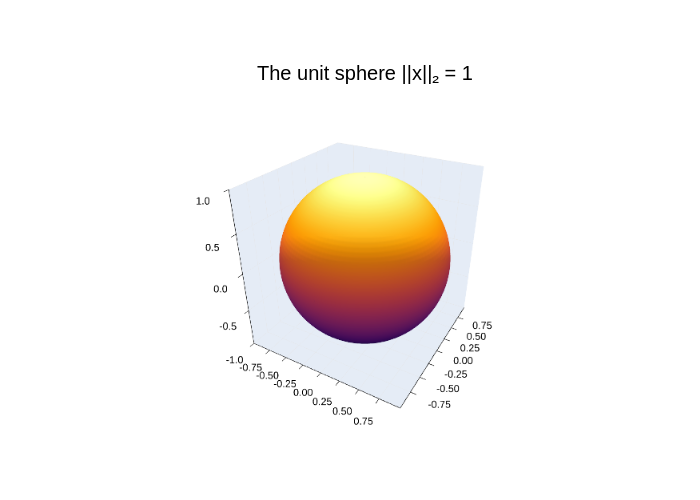

In [9]:
N = 128
θ = LinRange(0,2π,N)
ϕ = LinRange(-π/2,π/2,div(N,2))

x = cos.(θ) * cos.(ϕ)'
y = sin.(θ) * cos.(ϕ)'
z = ones(length(θ)) * sin.(ϕ)'
draw(surface(x,y,z,title="The unit sphere ||x||₂ = 1",legend=false))

### $\|Ax\|_2$ is a continuous function on the unit sphere

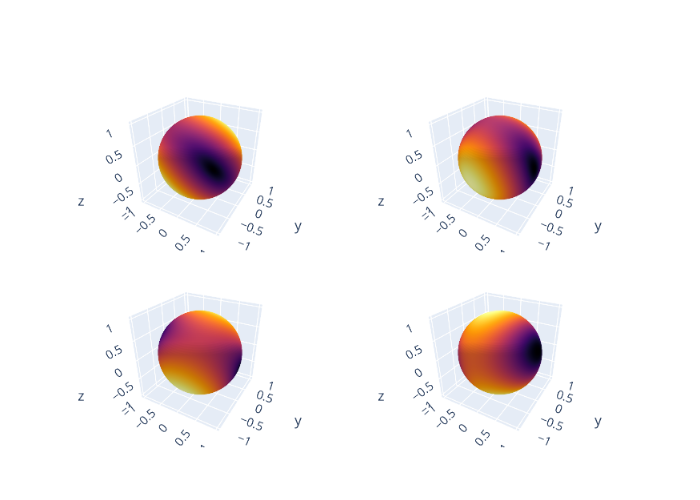

In [10]:
plots = []
for i in 1:4
    A = randn(3,3)
    xyz = [reshape(copy(x), length(x)) reshape(copy(y), length(y)) reshape(copy(z), length(z))]'
    Axyz = A * xyz
    normAxyz = [norm(Axyz[:,i],2) for i in 1:size(Axyz)[2]]
    c = reshape(normAxyz, (N, div(N,2)))
    push!(plots,surface(x,y,z,sc=c,legend=false,ticks=false))
end
draw(plot(plots[1],plots[2],plots[3],plots[4],layout=(2,2)))

$\|A\|_2$ for different $A$ matrices

### Continuous functions on compact sets attain their suprema

There is some $v_1$, $\|v_1\|_2 = 1$, such that

$$
\|Av_1\|_2 = \sup_{\|x\|_2 = 1} \|A x\|_2 = \|A\|_2.
$$

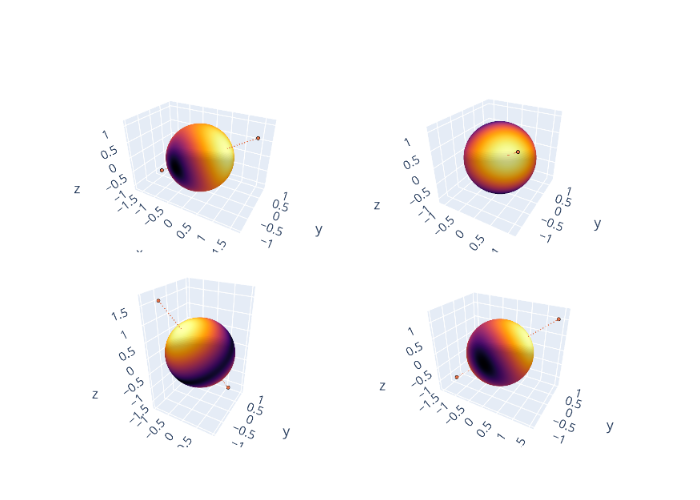

In [11]:
plots = []
for i in 1:4
    A = randn(3,3)
    _,_,V = svd(A)
    v_1 = V[:,1]
    xyz = [reshape(copy(x), length(x)) reshape(copy(y), length(y)) reshape(copy(z), length(z))]'
    Axyz = A * xyz
    normAxyz = [norm(Axyz[:,i],2) for i in 1:size(Axyz)[2]]
    c = reshape(normAxyz, (N, div(N,2)))
    thisplot = surface(x,y,z,sc=c,legend=false,ticks=false, lim=(-2,2))
    plot!(thisplot,2 .* [-v_1[1],v_1[1]],  2 .* [-v_1[2],v_1[2]], 2 .* [-v_1[3],v_1[3]], m=(1,:o), l=:dash)
    push!(plots,thisplot)
end
draw(plot(plots[1],plots[2],plots[3],plots[4],layout=(2,2)))

### Simple algorithm for (approximately) finding a $v_1$

(This is a _power iteration_: we will see why it works almost surely when we discuss eigensolvers)

In [12]:
function find_v1(A; tol=1.e-12, return_history=false)
    # find unit vector v₁ such that ||Av₁||₂ = ||A||₂
    m, n = size(A)
    vs = []
    # initial guess on the unit sphere
    v = randn(n); v ./= norm(v,2)
    if return_history push!(vs, v) end
    while true
        # compute (A'A)v
        v_next = A' * (A * v)
        # normalize to the unit sphere
        # this is the next guess
        v_next ./= norm(v_next,2)
        # how different is the new guess
        diff = norm(v - v_next,2)
        v = v_next
        if return_history push!(vs, v) end
        # stop when the change is small
        if (diff < tol) break end
    end
    if return_history
        return vs
    else
        return v
    end
end;

┌ Info: Saved animation to 
│   fn = /home/tisaac/srv/rep/22-course-cse6643/mybinder/tmp.gif
└ @ Plots /home/tisaac/.julia/packages/Plots/Xv2qA/src/animation.jl:114


Plots.AnimatedGif("/home/tisaac/srv/rep/22-course-cse6643/mybinder/tmp.gif")
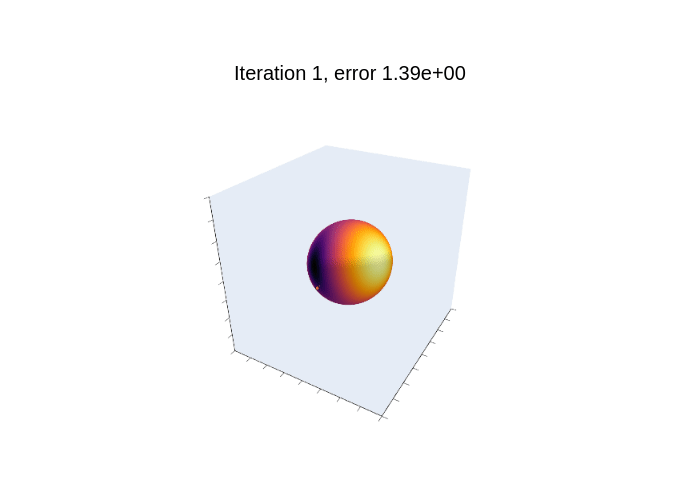

In [13]:
A = randn(3,3)
vs = find_v1(A, return_history=true)
xyz = [reshape(copy(x), length(x)) reshape(copy(y), length(y)) reshape(copy(z), length(z))]'
Axyz = A * xyz
normAxyz = [norm(Axyz[:,i],2) for i in 1:size(Axyz)[2]]
c = reshape(normAxyz, (N, div(N,2)))
@gif for i in 1:length(vs)
    v = vs[i]
    err = norm(v - vs[end])
    thisplot = surface(x,y,z,sc=c,legend=false,ticks=false, lim=(-2,2),title="Iteration $i, error $(@sprintf("%.2e", err))")
    plot!(thisplot, [-1.1,1.1].*v[1], [-1.1,1.1].*v[2], [-1.1,1.1].*v[3], m=(1,:o), line=:dash)
end

### Complete the bases

Define

$$
\sigma_1 = \|A\|_2,
$$
$$
u_1 = \frac{Av_1}{\|Av_1\|_2} = \frac{Av_1}{\sigma_1}.
$$

Choose an orthogonal complement $\{\tilde{v}_2,\dots,\tilde{v}_n\}$ to $v_1$, and construct the matrix
$$\tilde{V} = [\tilde{v}_2 | \dots | \tilde{v}_n].$$

$[v_1 | \tilde{V}]$ is unitary.

Choose an orthogonal complement $\{\tilde{u}_2,\dots,\tilde{u}_m\}$ to $u_1$, and construct the matrix
$$\tilde{U} = [\tilde{u}_2 | \dots | \tilde{u}_m].$$

$[u_1 | \tilde{U}]$ is unitary.

### What is $A^*u_1$?

Let
$$
y = A^* u_1.
$$

What is $\|y\|_2$?

$$\|y\|_2= \|A^*u_1\|_2 \leq \|A^*\|_2 \|u_1\|_2 = \sigma_1.$$

Break $y$ into $v_1$ and $\tilde{V}$ components (because $[v_1 | \tilde{V}]$ is unitary):

$$y = v_1 (v_1^*y) + \tilde{V}(\tilde{V}^*y) \quad \text{(sum of two orthogonal components)}$$

By the Pythagorean theorem,
$$\|y\|_2^2 = \|v_1(v_1^*y)\|_2^2 + \|\tilde{V}(\tilde{V}^*y)\|_2^2$$

$$
\begin{aligned}
\|y\|_2^2 &= \|v_1(v_1^*y)\|_2^2 + \|\tilde{V}(\tilde{V}^*y)\|_2^2 \\
&= |v_1^*y|^2  + \|\tilde{V}^* y\|_2^2 \\
&= |v_1^*(A^* u_1)|^2 + \|\tilde{V}^* (A^* u_1)\|_2^2 \\
&= |(A v_1)^* u_1|^2 + \|u_1^* A\tilde{V}\|_2^2 \\
&= |\sigma_1 u_1^* u_1|^2 + \|u_1^* A \tilde{V} \|_2^2 \\
&= \sigma_1^2 + \|u_1^* A \tilde{V}\|_2^2.
\end{aligned}
$$

**Claim:** This shows $u_1^* A \tilde{V} = 0.$

$$\sigma_1^2 \geq \|y\|_2^2 = \sigma_1^2 + \|u_1^* A \tilde{V}\|_2^2 \quad \Rightarrow \quad
0 \geq \| u_1^* A \tilde{V} \|_2^2.$$

### Put $A$ into the new bases

$$
[u_1 | \tilde{U}]^* A [v_1 | \tilde{V}] =
\begin{bmatrix}
& u_1^* & \\ \hline
& \tilde{U}^* & 
\end{bmatrix}
\begin{bmatrix}
& & \\
& A & \\
& & \\
\end{bmatrix}
\left[
\begin{array}{c|c}
& \\
v_1 & \tilde{V} \\
& \\
\end{array}
\right]
$$
$$
=
\left[
\begin{array}{c|c}
u_1^* A v_1 & u_1^* A \tilde{V} \\ \hline
\tilde{U}^* A v_1 & \tilde{U}^* A \tilde{V}
\end{array}
\right]
$$

$$u_1^* A v_1 = \sigma_1 u_1^* u_1 = \sigma_1$$

$$u_1^* A \tilde{V} = 0$$

$$\tilde{U}^* A v_1 = \sigma_1 \tilde{U}^* u_1 = 0$$

$$\tilde{U}^* A \tilde{V} = B$$

$$[u_1 | \tilde{U}]^* A [v_1 | \tilde{V}] = 
\left[
\begin{array}{c|c}
\sigma_1 & 0 \\ \hline
0 & B
\end{array}
\right]
$$

$$
\begin{bmatrix}
& & \\
& A & \\
& & \\
\end{bmatrix}
=
\left[
\begin{array}{c|c}
& \\
u_1 & \tilde{U} \\
& \\
\end{array}
\right]
\left[
\begin{array}{c|c}
\sigma_1 & 0 \\ \hline
0 & B
\end{array}
\right]
\begin{bmatrix}
& v_1^* & \\ \hline
& \tilde{V}^* & 
\end{bmatrix}
$$


By the inductive hypothesis, $B$ has an SVD
$$
B = U_B \Sigma_B V_B^*
$$

### Pull out $U_B$ and $V_B$

$$
\begin{bmatrix}
& & \\
& A & \\
& & \\
\end{bmatrix}
=
\left[
\begin{array}{c|c}
& \\
u_1 & \tilde{U} \\
& \\
\end{array}
\right]
\left[
\begin{array}{c|c}
\sigma_1 & 0 \\ \hline
0 & U_B \Sigma_B V_B^*
\end{array}
\right]
\begin{bmatrix}
& v_1^* & \\ \hline
& \tilde{V}^* & 
\end{bmatrix}
$$

$$
\begin{bmatrix}
& & \\
& A & \\
& & \\
\end{bmatrix}
=
\left[
\begin{array}{c|c}
& \\
u_1 & \tilde{U} \\
& \\
\end{array}
\right]
\left[
\begin{array}{c|c}
1 & 0 \\ \hline
0 & U_B
\end{array}
\right]
\left[
\begin{array}{c|c}
\sigma_1 & 0 \\ \hline
0 & \Sigma_B
\end{array}
\right]
\left[
\begin{array}{c|c}
1 & 0 \\ \hline
0 & V_B
\end{array}
\right]^*
\begin{bmatrix}
& v_1^* & \\ \hline
& \tilde{V}^* & 
\end{bmatrix}
$$

### Claim

$\left[
\begin{array}{c|c}
1 & 0 \\ \hline
0 & U_B
\end{array}
\right]$
and
$\left[
\begin{array}{c|c}
1 & 0 \\ \hline
0 & V_B
\end{array}
\right]$
are unitary.

_Proof._

$$
\left[
\begin{array}{c|c}
1 & 0 \\ \hline
0 & U_B
\end{array}
\right]^*
\left[
\begin{array}{c|c}
1 & 0 \\ \hline
0 & U_B
\end{array}
\right]
=
\left[
\begin{array}{c|c}
1 & 0 \\ \hline
0 & U_B^*
\end{array}
\right]
\left[
\begin{array}{c|c}
1 & 0 \\ \hline
0 & U_B
\end{array}
\right]
=
\left[
\begin{array}{c|c}
1 & 0 \\ \hline
0 & U_B^* U_B
\end{array}
\right]
$$

$$
=
\left[
\begin{array}{c|c}
1 & 0 \\ \hline
0 & I
\end{array}
\right]
=
I
$$

$$
\begin{bmatrix}
& & \\
& A & \\
& & \\
\end{bmatrix}
=
\underbrace{
\left[
\begin{array}{c|c}
& \\
u_1 & \tilde{U} \\
& \\
\end{array}
\right]
\left[
\begin{array}{c|c}
1 & 0 \\ \hline
0 & U_B
\end{array}
\right]
}_{U\ \text{(product of unitary = unitary)}}
\left[
\begin{array}{c|c}
\sigma_1 & 0 \\ \hline
0 & \Sigma_B
\end{array}
\right]
\underbrace{
\left(
\left[
\begin{array}{c|c}
& \\
v_1 & \tilde{V} \\
& \\
\end{array}
\right]
\left[
\begin{array}{c|c}
1 & 0 \\ \hline
0 & V_B
\end{array}
\right]
\right)^*
}_{V\ \text{(product of unitary = unitary)}}
$$

$$
\begin{bmatrix}
& & \\
& A & \\
& & \\
\end{bmatrix}
=
\left[
\begin{array}{c|c}
& \\
u_1 & \tilde{U} U_B \\
& \\
\end{array}
\right]
\left[
\begin{array}{c|c}
\sigma_1 & 0 \\ \hline
0 & \Sigma_B
\end{array}
\right]
\left[
\begin{array}{c|c}
& \\
v_1 & \tilde{V}V_B \\
& \\
\end{array}
\right]^*
$$

This is a full SVD of $A$.  By the inductive hypothesis, every matrix has an SVD.

### Exercise: complete `first_svd`

In [14]:
function first_svd(A)
    # Compute the full SVD of A using the algorithm
    # described by the inductive proof
    m, n = size(A)
    if norm(A,2) == 0 # absurd case: SVD of a zero matrix
        return (Matrix(1.0I,m,m), zeros(min(m,n)), Matrix(1.0I,n,n))
    end
    if m == 1 || n == 1
        return first_svd_base_case(A)
    end
    v1 = find_v1(A)
    Av1 = A * v1
    sigma1 = norm(Av1,2)
    u1 = Av1 / sigma1
    Vt = complete_basis(v1)
    Ut = complete_basis(u1)
    B = Ut' * A * Vt
    UB, SB, VB = first_svd(B)
    U = [u1 Ut * UB]
    V = [v1 Vt * VB]
    S = [sigma1; SB]
    return U,S,V
end;

In [15]:
A = randn(4,3)

4×3 Matrix{Float64}:
  1.65584   -1.18096    0.762543
 -1.16237    1.06932   -2.04355
 -0.855729   0.282405  -0.0279451
 -1.55811    2.81275   -0.305537

In [16]:
U,Σ,V = first_svd(A)
U[:,1:3] * diagm(Σ) * V' - A

4×3 Matrix{Float64}:
 -1.53211e-14  -3.4861e-14   -4.18554e-14
  1.22569e-13   1.03917e-13   2.66454e-15
 -7.54952e-15   3.44169e-15   1.91618e-14
 -9.37028e-14  -2.44249e-14   1.05138e-13

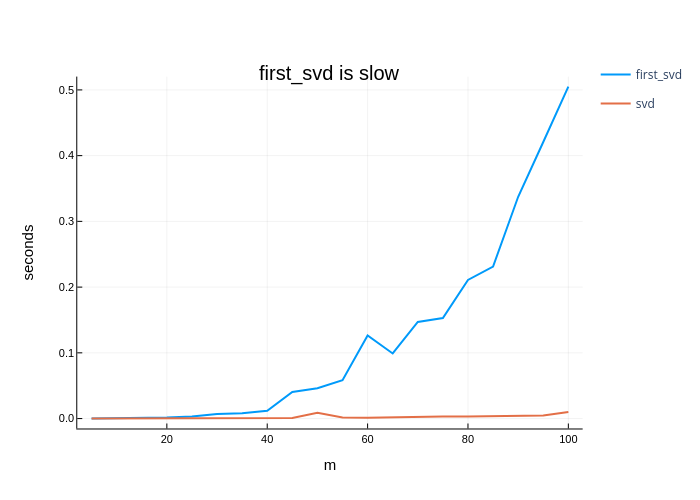

In [17]:
first_t = []
builtin_t = []

M = 5:5:100
for m in M
    push!(first_t,(@timed first_svd(rand(m,m))).time)
    push!(builtin_t,(@timed svd(rand(m,m))).time)
end
draw(plot(M, [first_t builtin_t]
    , label=["first_svd" "svd"]
    , xlabel="m"
    , ylabel="seconds"
    , title="first_svd is slow"
    , l=2
    , size=(900,550)
))

## SVD vs Eigenvalue Decomposition; Matrix Properties via the SVD

### Eigenvalue decomposition

A nondefective square matrix $A \in \mathbb{C}^{m \times m}$ has an _eigenvalue decomposition_

$$
A = \underbrace{X}_{\text{(not unitary)}} \underbrace{\Lambda}_{\text{(complex, diagonal)}} X^{-1}
$$

When it exists, $A$ is diagonal in the $X$ basis:

$$
b = XX^{-1}b = X \underbrace{(X^{-1}b)}_{b'}
$$

$$
v = XX^{-1}v = X \underbrace{(X^{-1}v)}_{v'}
$$

$$
b = Av \quad \Leftrightarrow \quad X^{-1} b = X^{-1} A v \quad \Leftrightarrow \quad X^{-1} b = X^{-1} X \Lambda X^{-1} v \quad \Leftrightarrow \quad b' = \Lambda v'
$$

### SVD vs. Eigenvalue Decomposition

**SVD**

- Every matrix (rectangular)
- Two different bases ($U$, $V$)
- Change of basis is explicit (apply adjoint), stable
- Real diagonal $\Sigma$
- Not very useful for powers of $A$:

$$
A^2 = U\Sigma \underbrace{V^* U}_{\text{(no simplification)}} \Sigma V^*
$$

- Requires inner product (geometric concept)

**Eigenvalue decomposition**

- Square, nondefective matrices
- One basis ($X$)
- Change of basis is implicit (invert), maybe unstable
- Complex diagonal $\Lambda$
- Useful for powers of $A$

$$
A^2 = X \Lambda X^{-1} X \Lambda X^{-1} =
X \Lambda^2 X^{-1}
$$

- Purely algebraic concept: no inner product or norm required

### Rank of $A$ via the SVD

**T&B Theorem 5.1.** The rank of $A$ is $r$, the number of nonzero singular values.

_Proof._

$$
\Sigma = 
\left[
\begin{array}{c|c|c|c|c|c}
\sigma_1 &        &          &   &        &   \\
         & \ddots &          &   &        &   \\
         &        & \sigma_r &   &        &   \\
         &        &          & 0 &        &   \\
         &        &          &   & \ddots &   \\
         &        &          &   &        & 0 \\ \hline
         &        &          &   &        & \\
         &        &          &   &        & \\
         &        &          &   &        &
\end{array}
\right]
=
\left[
\begin{array}{c|c|c|c|c|c}
 &        &          &   &        &   \\
         &  &          &   &        &   \\
         &        & &   &        &   \\
         &        &          & &        &   \\
\sigma_1 e_1 & \dots & \sigma_r e_r & 0 & \dots & 0 \\
         &        &          &   &        &  \\ 
         &        &          &   &        & \\
         &        &          &   &        & \\
         &        &          &   &        &
\end{array}
\right]
$$

Rank is the dimension of the span of the column vectors.

Rank of $\Sigma$ is $r$.

Change of bases $U$ and $V$ do not change the rank.

### Range via the SVD

**T&B Theorem 5.2.** If the rank of $A$ is $r$, then

$$
\mathrm{range}(A) = \mathrm{span}\{u_1,\dots,u_r\}.
$$

_Proof._

From slide above, $\mathrm{range}(\Sigma) = \mathrm{span}\{e_1,\dots,e_r\}$.

For general matrices $BC$, $\mathrm{range}(BC) = B[\mathrm{range}(C)]$, so

$$\mathrm{range}(U\Sigma) = \mathrm{span}\{Ue_1,\dots,Ue_r\} = \mathrm{span}\{u_1,\dots,e_r\}$$

For general matrix $B$ and invertible $C$, $\mathrm{range}(BC) = \mathrm{range}(B)$, so

$$\mathrm{range}(A) = \mathrm{range}(U\Sigma V^*) = \mathrm{range}(U\Sigma) = \mathrm{span}\{u_1,\dots,e_r\}.$$

### Nullspace via the SVD

**T&B Theorem 5.2.** If the rank of $A$ is $r$, then

$$
\mathrm{null}(A) = \mathrm{span}\{v_{r+1},\dots,v_n\}.
$$

_Proof._

From slide above, $\mathrm{null}(\Sigma) = \mathrm{span}\{e_{r+1},\dots,e_n\}$.

For general matrix $B$ and invertible $C$, $\mathrm{null}(BC) = C^{-1}[\mathrm{null}(B)]$, so

$$\mathrm{null}(\Sigma V^*) = V[\mathrm{null}(\Sigma)] = \mathrm{span}\{v_{r+1},\dots,v_n\}.$$

For general matrix $C$ and full rank $B$, $\mathrm{null}(BC) = \mathrm{null}(C)$, so

$$\mathrm{null}(A) = \mathrm{null}(U\Sigma V^*) = \mathrm{null}(\Sigma V^*) = \mathrm{span}\{v_{r+1},\dots,v_n\}.$$

### Matrix norms via the SVD

**T&B Theorem 5.3.** $\|A\|_2 = \sigma_1$.

_Proof._ Established in the constructive existence proof of the SVD.

**T&B Theorem 5.4.** $\|A\|_F = \left(\sum_{i=1}^{\min\{m,n\}} \sigma_i^2\right)^{1/2}.$

_Proof._ Established last time that $\|UA\|_F = \|A\|_F$ and $\|BU\|_F = \|B\|_F$ for unitary matrix $U$, so

$$
\|A\|_F = \|U \Sigma V^* \|_F = \|\Sigma\|_F.
$$

### Eigenvalues of $A^*A$ and $AA^*$ via the SVD

**T&B Theorem 5.4.** The nonzerosingular values of $A$ are the square roots of the nonzero eigenvalues of $A^*A$ or $AA^*$.

_Proof._

$$
A^*A = (U \Sigma V^*)^*(U\Sigma V^*) = V \Sigma^* U^* U \Sigma V^* = V \underbrace{\Sigma^* \Sigma}_{\text{(diagonal)}} V^*.
$$

Because the eigenvalue decomposition $A^*A = X \Lambda X^{-1}$ is unique, $V = X$, $\Sigma^* \Sigma = \Lambda$.

### Absolute value of the determinant of $A$ via the SVD

**T&B Theorem 5.6.** For $A \in \mathbb{C}^{m \times m}$, $|\det(A)| = \Pi_{i=1}^m \sigma_i.$

_Proof._ Determinants of products are products of determinants, so

$$
|\det(A)| = |\det(U\Sigma V^*)| = |\det(U)|\cdot |\det(\Sigma)|\cdot |\det(V^*)|.
$$

In a previous lecture exercise we established that an eigenvalue $\lambda$ of a unitary matrix $U$
has magnitude 1, $|\lambda| = 1$.  Therefore $|\det(U)| = |\det(V^*)| = 1$, so

$$
|\det(A)| = |\det(\Sigma)| = \Pi_{i=1}^m \sigma_i.
$$

### Exercise

**T&B Exercise 5.4.** Suppose $A\in\mathbb{C}^{m \times m}$ has an SVD $A = U \Sigma V^*$.  Find an
eigenvalue decomposition of the $2m \times 2m$ matrix

$$
\begin{bmatrix}
0 & A^* \\
A & 0
\end{bmatrix}.
$$

Just expanding the SVD, we see
$$
\begin{bmatrix}
0 & A^* \\
A & 0
\end{bmatrix}
=
\begin{bmatrix}
0 & V \Sigma U^* \\
U \Sigma V^* & 0
\end{bmatrix}
=
\begin{bmatrix}
V & 0 \\
0 & U \\
\end{bmatrix}
\begin{bmatrix}
0 & \Sigma \\
\Sigma & 0
\end{bmatrix}
\begin{bmatrix}
V^* & 0 \\
0 & U^* \\
\end{bmatrix},
$$

Which is almost an eigenvalue decomposition, but the center is not diagonal.  What next?

_Hint._ Note the eigen decomposition

$$
\begin{bmatrix}
0 & a \\
a & 0
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\begin{bmatrix}
a & 0 \\
0 & -a
\end{bmatrix}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}^{-1}.
$$

## Low-Rank Approximations

### The SVD is a sum of rank-one matrices

If $A$ has rank $r$, then

$$
A = U \Sigma V^* = \sum_{i=1}^r \underbrace{\sigma_i u_i v_i^*}_{\text{(outer product AKA rank-one matrix)}}.
$$

### There are many ways to write $A$ as the sum of rank-one matrices

**One per column**

$$
A = \sum_{j=1}^n a_j e_j^*
$$

**One per row**

$$
A = \sum_{i=1}^n e_i a_i^*
$$

**One per entry**

$$
A = \sum_{i=1}^m \sum_{j=1}^n a_{ij} e_i e_j^*.
$$

### Why do we care? low-rank matrices are _efficient_

**Store all entries of outer product $a_{ij} = u_i \bar v_j$**

- $O(mn)$ storage
- $O(mn)$ matrix-vector product operations

**Store outer product vectors $u$ and $v^*$**

- $O(m + n)$ storage
- $O(m + n)$ matrix-vector product operations:

$$
Ax = uv^* x = u(v^*x)
$$

1. compute $\alpha = v^*x$ ($O(n)$)
2. scale $u$ by $\alpha$ ($O(m+n)$)

A matrix stored as sum of $k$ rank-one matrices:

- $O(k(m+n))$ storage
- $O(k(m+n))$ matrix-vector product operations

### Even for high-rank matrices, low-rank matrices can be good approximations

If $r$ is the rank of $A$, then $A$ cannot be written as the sum of $<r$ rank-one matrices.

But it is often possible to find $k \ll r$ such that a rank-$k$ matrix is a good approximation of $A$.

### Partial SVDs

For $0\leq \nu \leq r$, define

$$
A_\nu = \sum_{j=1}^\nu \sigma_j u_j v_j^*.
$$

Because the singular values are ordered $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0$,
$A_\nu$ is in some sense the _best rank-$\nu$ approximation of $A$_.

### "good approximation", "best approximation": what do we mean?

Different applications have different requirements of approximations, there's no universal answer.

_However..._

**2-norm closeness** and **Frobenius norm closeness** are _very_ useful ways to define "goodness" in many applications.

### Partial SVDs are the best 2-norm approximations

**T&B Theorem 5.8.** Given $A\in\mathbb{C}^{m \times n}$ with SVD $A = U \Sigma V^*$, define

$$
A_\nu = \sum_{j=1}^\nu \sigma_j u_j v_j^*.
$$

Then

$$
\| A - A_\nu \|_2 = \inf_{\substack{B\in\mathbb{C}^{m \times n} \\ \mathrm{rank}(B) \leq \nu}}
\| A - B \|_2 = \sigma_{\nu + 1}.
$$

(The SVD provides the best rank-$\nu$ approximation, and the next singular value $\sigma_{\nu+1}$ measures
the error of the approximation.)

_Proof._  First to show that $\|A - A_\nu\|_2 = \sigma_{\nu + 1}$:

$$
A - A_\nu = \left(\sum_{i=1}^r \sigma_j u_j v_j^*\right) - \left(\sum_{i=1}^\nu \sigma_j u_j v_j^*\right)
= \underbrace{\sum_{i=\nu+1}^r \sigma_j u_j v_j^*}_{\text{(this is still in SVD format)}}.
$$

The expression on the right is the (non-nullspace portion of) the SVD of $A - A_\nu$, with largest
singular value $\sigma_{\nu + 1}$.  By T&B theorem 5.3, $\|A - A_\nu\|_2 = \sigma_{\nu+1}$.

Now to show that $\| A - A_\nu \|_2 = \inf_{\substack{B\in\mathbb{C}^{m \times n} \\ \mathrm{rank}(B) \leq \nu}}
\| A - B \|_2$:

If $\mathrm{rank}(B) \leq \nu$, then the dimension of $\mathrm{null}(B)$ is at least $(n - \nu)$.  By a counting argument, $\mathrm{null}(B)$ must intersect with $\mathrm{span}\{v_1,\dots,v_{\nu+1}\}$: the intersection must contain some nonzero vector $x'$.

- For every $x \in \mathrm{span}\{v_1,\dots,v_{\nu+1}\}$, $\|A x\|_2 \geq \sigma_{\nu + 1} \|x\|_2$,
  so $\|A x'\|_2 \geq \sigma_{\nu+1} \|x\|_2.$
- But $x' \in \mathrm{null}(B)$ implies $(A - B)x' = Ax'$.
- Therefore

$$
\|A - B\|_2 \geq \frac{\|(A-B)x'\|_2}{\|x'\|_2} = \frac{\|Ax'\|_2}{\|x'\|_2} \geq \sigma_{\nu+1}.
$$

### Exercise

**T&B Exercise 5.2.** Using the SVD, prove that any matrix in $\mathbb{C}^{m \times n}$ is the limit of a sequence of matrices of full rank.  In other words, prove that the set of full-rankk matrices is a dense subset of $\mathbb{C}^{m \times n}$.  Use the 2-norm for your proof.

(Restated: given $A \in \mathbb{C}^{m \times n}$ and $\epsilon > 0$ prove that there exists a full-rank matrix
$B$ such that $\|A - B\|_2 \leq \epsilon$.)

_Proof._

### Partial SVDs are _also_ the best Frobenius approximations

**T&B Theorem 5.8.** Given $A\in\mathbb{C}^{m \times n}$ with SVD $A = U \Sigma V^*$, define

$$
A_\nu = \sum_{j=1}^\nu \sigma_j u_j v_j^*.
$$

Then

$$
\| A - A_\nu \|_F = \inf_{\substack{B\in\mathbb{C}^{m \times n} \\ \mathrm{rank}(B) \leq \nu}}
\| A - B \|_F = \sqrt{\sum_{i=\nu+1}^{\min\{m,n\}} \sigma_i^2}.
$$

(The SVD provides the best rank-$\nu$ approximation, and the 2-norm of the remaining singular values measures
the error of the approximation.)

### Application: image compression

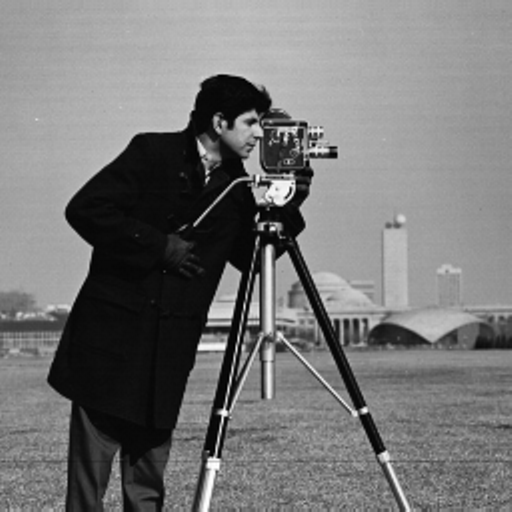

In [27]:
img = testimage("cameraman")

### Grayscale to numbers and take the SVD

In [28]:
img_float = map(Float64,img)
A = img_float .- 0.5
U, Σ, V = svd(A);

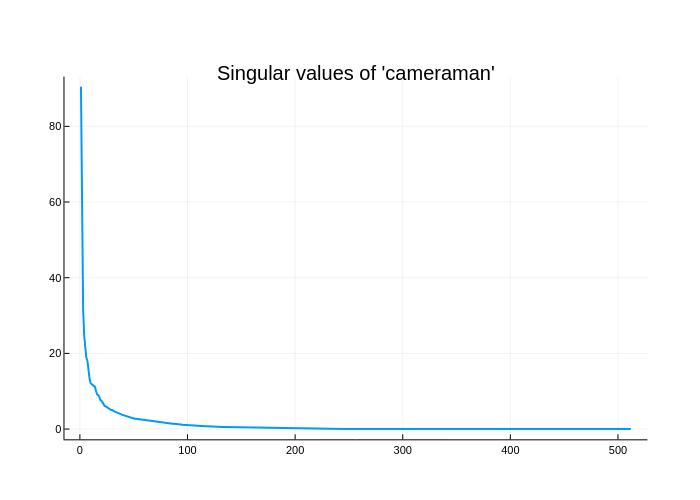

In [29]:
draw(plot(Σ,title="Singular values of 'cameraman'",legend=false))

┌ Info: Saved animation to 
│   fn = /home/tisaac/srv/rep/22-course-cse6643/mybinder/cm.gif
└ @ Plots /home/tisaac/.julia/packages/Plots/Xv2qA/src/animation.jl:114


Plots.AnimatedGif("/home/tisaac/srv/rep/22-course-cse6643/mybinder/cm.gif")
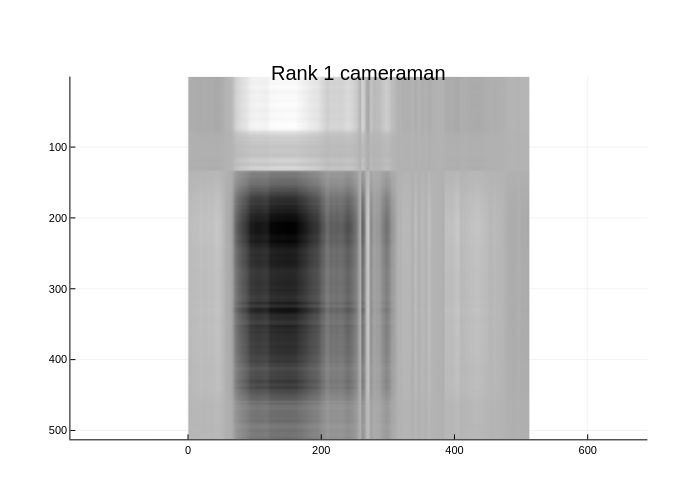

In [30]:
anim = @animate for nu in [1,2,4,8,16,32,64,128,256,512]
    A_nu = U[:,1:nu] * diagm(Σ[1:nu]) * V[:,1:nu]'
    A_nu_max = maximum(A_nu)
    A_nu_min = minimum(A_nu)
    img_nu = map(Gray{N0f8}, (A_nu .- A_nu_min) ./ (A_nu_max - A_nu_min))
    plot(img_nu, title="Rank $nu cameraman", aspect_ratio=:equal)
end
gif(anim,"cm.gif", fps=4)

In [31]:
mystery_img = load("mystery.jpg");
eltype(mystery_img)
m_r = map(Float64,map(red,mystery_img)) .- 0.5
m_g = map(Float64,map(green,mystery_img)) .- 0.5
m_b = map(Float64,map(blue,mystery_img)) .- 0.5
U_r, Σ_r, V_r = svd(m_r)
U_g, Σ_g, V_g = svd(m_g)
U_b, Σ_b, V_b = svd(m_b);

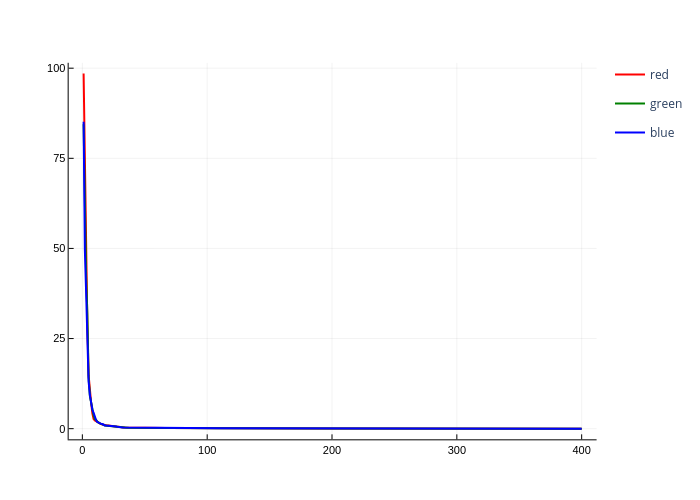

In [32]:
draw(plot([Σ_r Σ_g Σ_b],color=[:red :green :blue], label=["red" "green" "blue"]))

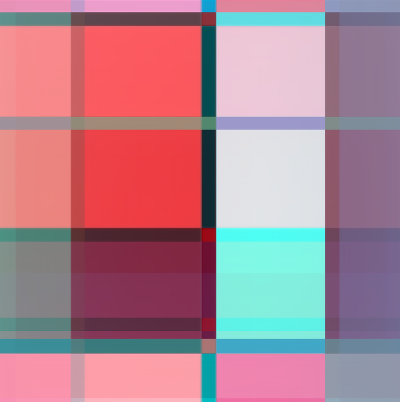

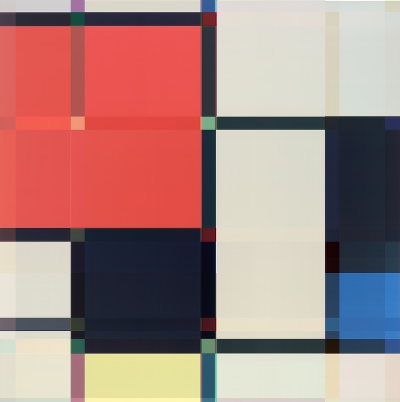

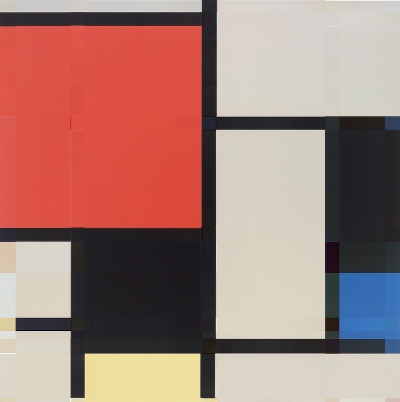

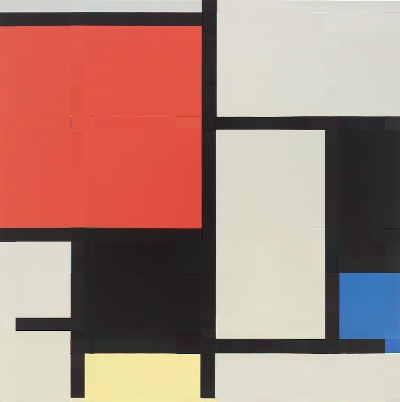

In [36]:
normalize(X) = (X .- minimum(X)) ./ (maximum(X) - minimum(X))
if STATIC_LECTURE
    for nu in [1,4,7,10]
        R_nu = U_r[:,1:nu] * diagm(Σ_r[1:nu]) * V_r[:,1:nu]'
        G_nu = U_g[:,1:nu] * diagm(Σ_g[1:nu]) * V_g[:,1:nu]'
        B_nu = U_b[:,1:nu] * diagm(Σ_b[1:nu]) * V_b[:,1:nu]'
        display(map(RGB{Float64}, normalize(R_nu), normalize(G_nu), normalize(B_nu)))
    end
else
    using Interact;
    @manipulate for nu=1:10
        R_nu = U_r[:,1:nu] * diagm(Σ_r[1:nu]) * V_r[:,1:nu]'
        G_nu = U_g[:,1:nu] * diagm(Σ_g[1:nu]) * V_g[:,1:nu]'
        B_nu = U_b[:,1:nu] * diagm(Σ_b[1:nu]) * V_b[:,1:nu]'
        map(RGB{Float64}, normalize(R_nu), normalize(G_nu), normalize(B_nu))
    end
end

Piet Mondrian. CC0 1.0 Credit: rawpixel.com / Museum of New Zealand (Source)

### Backup Exercise

**Fredholm's theorem.** Given $A \in \mathbb{C}^{m \times n}$, we can decompose $\mathbb{C}^m$ into two orthogonal subspaces: $\mathrm{range}(A)$ and $\mathrm{null}(A^*)$.

_Proof._